# Project Left Coast, what gentrification impact is on minoroties, in particular black community, observe and study the income gap and rise of housing pricing in major metro area in California

In [2]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
from functools import reduce

# Step1 Import California ZIp Code fo major cities

In [50]:
#manipulate dataframes in python

#make API calls with python
import requests

#allows us to store results of API call cleanly
import json

#get list of all zipcodes in Los Angeles County separated by commas
CAZips = open('CAMetroZip.csv', 'r', encoding='utf-8-sig').readlines()
CAZips = [z.replace('\n', '') for z in CAZips]
CAZips = ','.join(CAZips)
CAZips = CAZips.split(",")
print(CAZips)



['90001', '90002', '90003', '90004', '90005', '90006', '90007', '90008', '90010', '90011', '90012', '90013', '90014', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90043', '90044', '90045', '90046', '90047', '90048', '90049', '90056', '90057', '90058', '90059', '90061', '90062', '90063', '90064', '90065', '90066', '90067', '90068', '90069', '90071', '90073', '90077', '90079', '90089', '90090', '90094', '90095', '90201', '90210', '90211', '90212', '90220', '90221', '90222', '90230', '90232', '90240', '90241', '90242', '90245', '90247', '90248', '90249', '90250', '90254', '90255', '90260', '90262', '90263', '90265', '90266', '90270', '90272', '90274', '90275', '90277', '90278', '90280', '90290', '90291', '90292', '90293', '90301', '90302', '90303', '90304', '90305', '90401', '90402', '90403', 

In [51]:
print(len(CAZips))

889


# Step 2 Call Census API to download cencus data for CA, call the API in batch of 50

In [252]:
def callCensus(year,columns,columnsName,zipcodelist):
    #put your census API key here
    apiKey = "a42e7055065d5e402200a83eef5e3d6cddc7d601"

    #construct the API call we will use
    baseAPI = "https://api.census.gov/data/%s/acs/acs5?key=%s&get="+','.join(columns)+"&for=zip%%20code%%20tabulation%%20area:%s" 
    #This wont work!
    #baseAPI = "https://api.census.gov/data/2017/acs/acs5?key=%s&get="+column+"&for=zip%%20code%%20tabulation%%20area:*&in=state:06+county:*" 
    tempDF=pd.DataFrame
    #length=len(zipcodelist)
    #length=100
    length=200
    base=0
    print(','.join(columnsName))
    if(length>50):
        batch=[]
        i=0
        j=0
        while i <= length: 
            if((j<50) and (i<=length)):
                batch.append(zipcodelist[i+base])
                j +=1
                i += 1
            else:
                j=0
                calledAPI = baseAPI % (year,apiKey, ','.join(batch))
                print("Total length:"+str(length)+", i is:"+str(i))
                print(calledAPI)
                #call the API and collect the response
                response = requests.get(calledAPI)
                print(response.text)
                #load the response into a JSON, ignoring the first element which is just field labels
                formattedResponse = json.loads(response.text)[1:]

                #flip the order of the response from [population, zipcode] -> [zipcode, population]
                #formattedResponse = [item[::-1] for item in formattedResponse]
                col=columnsName+['Zip_Code'] #','.join(columnsName)]
                tempDF=pd.DataFrame(columns=col, data=formattedResponse)       
    return tempDF


In [253]:
#https://api.census.gov/data/2017/acs/acs5/variables.html
columns=['B01003_001E','B07013_002E','B07013_003E','B05002_013E','B17001B_011E','B17001I_025E','B17001A_054E',
         'C27001B_006E','C27001B_007E','C27001I_006E','C27001I_006E','C27001A_006E','C27001A_007E','B19019_001E','B19013B_001E','B19013I_001E','B19013H_001E','B02001_003E','B02001_002E','B03001_001E','B02001_007E']
#columns=['B01003_001E','B07013_002E','B07013_003E','B05002_013E','B17020B_001E','B17020I_001E','B17020H_001E','C27001B_001E','C27001I_001E','C27001H_001E','B19001_001E','B19013B_001E','B19013I_001E','B19013H_001E','B02001_003E','B02001_002E','B03001_001E','B02001_007E']
#columns=['B01003_001E','B07013_002E','B07013_003E','B05002_013E','B17020I_001E','B17020H_001E','C27001B_001E','C27001I_001E','C27001H_001E','B17020B_001E','B19001_001E','B19001B_001E','B19001I_001E','B19001H_001E','B02001_003E','B02001_002E','B02001_005E','B02001_007E']
#columns=[Population_  ,Home_Ownership_, Renter_,    Foerign_Born_]
yearList=['2012','2013','2014','2015','2016','2017']
#B17020D_001E Asian poverty
#B17020H_001E white poverty
#C27014_009E Estimate!!Total!!Did not work!!With public coverage
#C27014_010E Estimate!!Total!!Did not work!!No public coverage
#C27014_001E Private Heath Insurance
#C27012_001E HEALTH INSURANCE COVERAGE STATUS AND TYPE BY WORK EXPERIENCE Total
#C27004_001E EMPLOYER-BASED HEALTH INSURANCE BY SEX BY AGE
#C27001I_001E Hispanic Insurance coverage
#C27001H_001E White Insurance coverage alternativly white alone is C27001A_001E
#C27001B_001E Black Insurance coverage
census_df_list=[]
for year in yearList:
    columnsName=['Population_%s'% (year),'Home_Ownership_%s'% (year),'Renter_%s'% (year),'Foreign_Born_%s'% (year),'Poverty_Black_%s'% (year),'Poverty_Hispanic_%s'% (year),'Poverty_White_%s'% (year),'Black_Insurance_Coverage_%s'% (year),'Black_No_Insurance_Coverage_%s'% (year),'Hispanic_Insurance_Coverage_%s'% (year),'Hispanic_No_Insurance_Coverage_%s'% (year),'White_Insurance_Coverage_%s'% (year),'White_No_Insurance_Coverage_%s'% (year),'Total_Income_%s'% (year),'Total_Income_Black_%s'% (year),'Total_Income_Hispanic_%s'% (year),'Total_Income_White_%s'% (year),'Population_Black_%s'% (year),'Population_White_%s'% (year),'Population_Hispanic_%s'% (year),'Population_Other_%s'% (year)]
    #columnsName=['Population_%s'% (year),'Home_Ownership_%s'% (year),'Renter_%s'% (year),'Poverty_Black_%s'% (year),'Poverty_Hispanic_%s'% (year),'Poverty_White_%s'% (year),'Black_Insurance_Coverage_%s'% (year),'Hispanic_Insurance_Coverage_%s'% (year),'White_Insurance_Coverage_%s'% (year),'Foreign_Born_%s'% (year),'Total_Income_%s'% (year),'Total_Income_Black_%s'% (year),'Total_Income_Hispanic_%s'% (year),'Total_Income_White_%s'% (year),'Population_Black_%s'% (year),'Population_White_%s'% (year),'Population_Asian_%s'% (year),'Population_Other_%s'% (year)]   
#columnsName=['Population_%s'% (year),'Home_Ownership_%s'% (year),'Renter_%s'% (year),'Poverty_Black%s'% (year),'Poverty_Hispanic%s'% (year),'Poverty_White%s'% (year),'No_Work_Public_Insurance%s'% (year),'No_Work_Public_Insurance%s'% (year),'Private_Insurance%s'% (year),'Black_Insurance_Coverage%s'% (year),'White_Insurance_Coverage%s'% (year),'Foreign_Born_%s'% (year),'Total_Income_%s'% (year),'Population_White_%s'% (year),'Population_Black_%s'% (year),'Population_Asian_%s'% (year),'Population_Other_%s'% (year)]
    #avg_house_price, poverty_level, diversity_measures
    tempDF=callCensus(year,columns,columnsName,CAZips)
    #store the response in a dataframe
    census_df_list.append(tempDF)
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Zip_Code'],
                                            how='outer'), census_df_list)


Population_2012,Home_Ownership_2012,Renter_2012,Foreign_Born_2012,Poverty_Black_2012,Poverty_Hispanic_2012,Poverty_White_2012,Black_Insurance_Coverage_2012,Black_No_Insurance_Coverage_2012,Hispanic_Insurance_Coverage_2012,Hispanic_No_Insurance_Coverage_2012,White_Insurance_Coverage_2012,White_No_Insurance_Coverage_2012,Total_Income_2012,Total_Income_Black_2012,Total_Income_Hispanic_2012,Total_Income_White_2012,Population_Black_2012,Population_White_2012,Population_Hispanic_2012,Population_Other_2012
Total length:200, i is:50
https://api.census.gov/data/2012/acs/acs5?key=a42e7055065d5e402200a83eef5e3d6cddc7d601&get=B01003_001E,B07013_002E,B07013_003E,B05002_013E,B17001B_011E,B17001I_025E,B17001A_054E,C27001B_006E,C27001B_007E,C27001I_006E,C27001I_006E,C27001A_006E,C27001A_007E,B19019_001E,B19013B_001E,B19013I_001E,B19013H_001E,B02001_003E,B02001_002E,B03001_001E,B02001_007E&for=zip%20code%20tabulation%20area:90001,90002,90003,90004,90005,90006,90007,90008,90010,90011,90012,90013,90014,9

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["54480","21454","32053","23718","32","1210","2062","2163","794","14266","14266","10774","11547","35658","28428","36875","19583","4967","38027","54480","10576","90001"],
["48613","20173","27476","16212","193","925","1579","5452","1718","10669","10669","8641","7731","32299","22443","38335","17778","13202","28786","48613","5990","90002"],
["67226","23732","41840","26472","280","1426","1420","6843","2941","12711","12711","7149","7608","29174","22345","35146","26579","17349","25021","67226","23300","90003"],
["62884","12409","48953","34691","36","852","1512","869","478","7562","7562","9456","5672","38430","28115","31575","62321","1889","21535","62884","21076"

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["54480","21454","32053","23718","32","1210","2062","2163","794","14266","14266","10774","11547","35658","28428","36875","19583","4967","38027","54480","10576","90001"],
["48613","20173","27476","16212","193","925","1579","5452","1718","10669","10669","8641","7731","32299","22443","38335","17778","13202","28786","48613","5990","90002"],
["67226","23732","41840","26472","280","1426","1420","6843","2941","12711","12711","7149","7608","29174","22345","35146","26579","17349","25021","67226","23300","90003"],
["62884","12409","48953","34691","36","852","1512","869","478","7562","7562","9456","5672","38430","28115","31575","62321","1889","21535","62884","21076"

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["54480","21454","32053","23718","32","1210","2062","2163","794","14266","14266","10774","11547","35658","28428","36875","19583","4967","38027","54480","10576","90001"],
["48613","20173","27476","16212","193","925","1579","5452","1718","10669","10669","8641","7731","32299","22443","38335","17778","13202","28786","48613","5990","90002"],
["67226","23732","41840","26472","280","1426","1420","6843","2941","12711","12711","7149","7608","29174","22345","35146","26579","17349","25021","67226","23300","90003"],
["62884","12409","48953","34691","36","852","1512","869","478","7562","7562","9456","5672","38430","28115","31575","62321","1889","21535","62884","21076"

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["54760","20772","33004","24376","44","1304","1964","2034","748","14014","14014","9187","10495","35097","27348","36453","11908","4658","32886","54760","16219","90001"],
["49475","19301","29203","16570","178","901","1414","5415","1924","10602","10602","7583","7774","31258","21508","38113","14250","12892","26383","49475","9368","90002"],
["66200","22764","41981","25423","238","1387","1095","6682","2865","12364","12364","5095","5517","29686","21076","36266","31667","16990","17985","66200","29569","90003"],
["62760","11219","50066","34490","26","931","1461","922","567","7827","7827","9218","5715","37976","26121","31486","60708","1972","21165","62760","21953",

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["54760","20772","33004","24376","44","1304","1964","2034","748","14014","14014","9187","10495","35097","27348","36453","11908","4658","32886","54760","16219","90001"],
["49475","19301","29203","16570","178","901","1414","5415","1924","10602","10602","7583","7774","31258","21508","38113","14250","12892","26383","49475","9368","90002"],
["66200","22764","41981","25423","238","1387","1095","6682","2865","12364","12364","5095","5517","29686","21076","36266","31667","16990","17985","66200","29569","90003"],
["62760","11219","50066","34490","26","931","1461","922","567","7827","7827","9218","5715","37976","26121","31486","60708","1972","21165","62760","21953",

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["54760","20772","33004","24376","44","1304","1964","2034","748","14014","14014","9187","10495","35097","27348","36453","11908","4658","32886","54760","16219","90001"],
["49475","19301","29203","16570","178","901","1414","5415","1924","10602","10602","7583","7774","31258","21508","38113","14250","12892","26383","49475","9368","90002"],
["66200","22764","41981","25423","238","1387","1095","6682","2865","12364","12364","5095","5517","29686","21076","36266","31667","16990","17985","66200","29569","90003"],
["62760","11219","50066","34490","26","931","1461","922","567","7827","7827","9218","5715","37976","26121","31486","60708","1972","21165","62760","21953",

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["38504","6725","31182","24111","0","106","1702","392","240","3322","3322","12122","6864","36906","50000","43025","28784","937","28780","38504","2638","91205"],
["33014","12694","19650","18971","8","48","1565","310","13","2271","2271","11769","4436","52570","80598","57941","47090","505","24894","33014","1035","91206"],
["10435","6734","3507","5145","2","0","401","2","5","668","668","4158","790","91005","-666666666","107652","81731","7","8004","10435","182","91207"],
["15962","11228","4427","5738","0","0","731","67","0","701","701","6385","1430","92532","-666666666","49922","93855","104","12635","15962","236","91208"],
["651","29","622","183","0","0","45",

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["56314","20855","34367","24277","74","1319","1669","2448","872","15969","15969","8674","8185","34050","25722","35338","11103","5330","28097","56314","21612","90001"],
["50098","20253","28754","16972","213","927","1103","5248","1957","11901","11901","7530","6804","30214","21610","37207","21063","12316","24235","50098","12689","90002"],
["66913","22251","43483","25468","202","1459","885","6577","2676","13677","13677","4693","4383","30016","20616","36050","32143","16486","14979","66913","33584","90003"],
["63547","11468","50576","34034","49","924","1330","1260","640","9325","9325","9683","5276","38493","27619","32116","62151","2271","21951","63547","20702",

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["56314","20855","34367","24277","74","1319","1669","2448","872","15969","15969","8674","8185","34050","25722","35338","11103","5330","28097","56314","21612","90001"],
["50098","20253","28754","16972","213","927","1103","5248","1957","11901","11901","7530","6804","30214","21610","37207","21063","12316","24235","50098","12689","90002"],
["66913","22251","43483","25468","202","1459","885","6577","2676","13677","13677","4693","4383","30016","20616","36050","32143","16486","14979","66913","33584","90003"],
["63547","11468","50576","34034","49","924","1330","1260","640","9325","9325","9683","5276","38493","27619","32116","62151","2271","21951","63547","20702",

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["56314","20855","34367","24277","74","1319","1669","2448","872","15969","15969","8674","8185","34050","25722","35338","11103","5330","28097","56314","21612","90001"],
["50098","20253","28754","16972","213","927","1103","5248","1957","11901","11901","7530","6804","30214","21610","37207","21063","12316","24235","50098","12689","90002"],
["66913","22251","43483","25468","202","1459","885","6577","2676","13677","13677","4693","4383","30016","20616","36050","32143","16486","14979","66913","33584","90003"],
["63547","11468","50576","34034","49","924","1330","1260","640","9325","9325","9683","5276","38493","27619","32116","62151","2271","21951","63547","20702",

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["56314","20855","34367","24277","74","1319","1669","2448","872","15969","15969","8674","8185","34050","25722","35338","11103","5330","28097","56314","21612","90001"],
["50098","20253","28754","16972","213","927","1103","5248","1957","11901","11901","7530","6804","30214","21610","37207","21063","12316","24235","50098","12689","90002"],
["66913","22251","43483","25468","202","1459","885","6577","2676","13677","13677","4693","4383","30016","20616","36050","32143","16486","14979","66913","33584","90003"],
["63547","11468","50576","34034","49","924","1330","1260","640","9325","9325","9683","5276","38493","27619","32116","62151","2271","21951","63547","20702",

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["64008","11327","51066","33594","47","769","1529","1419","524","11176","11176","11821","5044","40612","29219","33616","65257","2323","24415","64008","18348","90004"],
["38979","3340","34815","23836","6","811","598","1145","377","5328","5328","3120","2186","31142","29737","29485","39551","2139","7185","38979","15586","90005"],
["61625","5007","55053","37087","40","1113","578","913","454","12612","12612","4109","3441","31521","24773","31342","37344","1973","11569","61625","35008","90006"],
["43426","4660","32477","19332","112","652","445","2601","516","8694","8694","8750","1828","22304","17144","28635","19203","4417","12434","43426","16371","90007"],
["318

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["64008","11327","51066","33594","47","769","1529","1419","524","11176","11176","11821","5044","40612","29219","33616","65257","2323","24415","64008","18348","90004"],
["38979","3340","34815","23836","6","811","598","1145","377","5328","5328","3120","2186","31142","29737","29485","39551","2139","7185","38979","15586","90005"],
["61625","5007","55053","37087","40","1113","578","913","454","12612","12612","4109","3441","31521","24773","31342","37344","1973","11569","61625","35008","90006"],
["43426","4660","32477","19332","112","652","445","2601","516","8694","8694","8750","1828","22304","17144","28635","19203","4417","12434","43426","16371","90007"],
["318

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["64008","11327","51066","33594","47","769","1529","1419","524","11176","11176","11821","5044","40612","29219","33616","65257","2323","24415","64008","18348","90004"],
["38979","3340","34815","23836","6","811","598","1145","377","5328","5328","3120","2186","31142","29737","29485","39551","2139","7185","38979","15586","90005"],
["61625","5007","55053","37087","40","1113","578","913","454","12612","12612","4109","3441","31521","24773","31342","37344","1973","11569","61625","35008","90006"],
["43426","4660","32477","19332","112","652","445","2601","516","8694","8694","8750","1828","22304","17144","28635","19203","4417","12434","43426","16371","90007"],
["318

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["64008","11327","51066","33594","47","769","1529","1419","524","11176","11176","11821","5044","40612","29219","33616","65257","2323","24415","64008","18348","90004"],
["38979","3340","34815","23836","6","811","598","1145","377","5328","5328","3120","2186","31142","29737","29485","39551","2139","7185","38979","15586","90005"],
["61625","5007","55053","37087","40","1113","578","913","454","12612","12612","4109","3441","31521","24773","31342","37344","1973","11569","61625","35008","90006"],
["43426","4660","32477","19332","112","652","445","2601","516","8694","8694","8750","1828","22304","17144","28635","19203","4417","12434","43426","16371","90007"],
["318

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["57942","20474","36352","24508","73","1272","1134","2395","512","20573","20573","8316","4358","34323","23942","35646","34306","5153","20811","57942","30661","90001"],
["51826","20426","30380","18359","185","903","801","5504","1604","14704","14704","6982","4963","32520","26681","36410","21481","11188","19573","51826","19716","90002"],
["70208","23021","45834","26529","156","1282","1348","7376","1804","18852","18852","7679","3911","31878","21090","37641","26763","16206","18114","70208","34284","90003"],
["63095","11334","50094","32106","72","641","1786","1545","463","12479","12479","13299","4507","43180","29345","36916","69419","2405","25611","63095","1675

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["57942","20474","36352","24508","73","1272","1134","2395","512","20573","20573","8316","4358","34323","23942","35646","34306","5153","20811","57942","30661","90001"],
["51826","20426","30380","18359","185","903","801","5504","1604","14704","14704","6982","4963","32520","26681","36410","21481","11188","19573","51826","19716","90002"],
["70208","23021","45834","26529","156","1282","1348","7376","1804","18852","18852","7679","3911","31878","21090","37641","26763","16206","18114","70208","34284","90003"],
["63095","11334","50094","32106","72","641","1786","1545","463","12479","12479","13299","4507","43180","29345","36916","69419","2405","25611","63095","1675

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["57942","20474","36352","24508","73","1272","1134","2395","512","20573","20573","8316","4358","34323","23942","35646","34306","5153","20811","57942","30661","90001"],
["51826","20426","30380","18359","185","903","801","5504","1604","14704","14704","6982","4963","32520","26681","36410","21481","11188","19573","51826","19716","90002"],
["70208","23021","45834","26529","156","1282","1348","7376","1804","18852","18852","7679","3911","31878","21090","37641","26763","16206","18114","70208","34284","90003"],
["63095","11334","50094","32106","72","641","1786","1545","463","12479","12479","13299","4507","43180","29345","36916","69419","2405","25611","63095","1675

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["57942","20474","36352","24508","73","1272","1134","2395","512","20573","20573","8316","4358","34323","23942","35646","34306","5153","20811","57942","30661","90001"],
["51826","20426","30380","18359","185","903","801","5504","1604","14704","14704","6982","4963","32520","26681","36410","21481","11188","19573","51826","19716","90002"],
["70208","23021","45834","26529","156","1282","1348","7376","1804","18852","18852","7679","3911","31878","21090","37641","26763","16206","18114","70208","34284","90003"],
["63095","11334","50094","32106","72","641","1786","1545","463","12479","12479","13299","4507","43180","29345","36916","69419","2405","25611","63095","1675

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["38843","4470","32427","20595","11","497","1605","624","134","8120","8120","7939","3239","37379","34150","34050","46793","1124","14832","38843","14780","90029"],
["3759","799","2937","2415","0","0","49","151","20","185","185","493","107","47115","70313","32396","61250","180","867","3759","124","90010"],
["49718","10965","26034","13847","0","13","1467","680","86","4178","4178","18027","982","59418","43750","18547","82975","1040","29866","49718","1572","90024"],
["47453","12720","33963","16641","5","120","3535","1121","142","4541","4541","19714","1969","78713","69180","61224","79994","1469","29585","47453","2991","90025"],
["39103","12419","25598","17997",

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["38843","4470","32427","20595","11","497","1605","624","134","8120","8120","7939","3239","37379","34150","34050","46793","1124","14832","38843","14780","90029"],
["3759","799","2937","2415","0","0","49","151","20","185","185","493","107","47115","70313","32396","61250","180","867","3759","124","90010"],
["49718","10965","26034","13847","0","13","1467","680","86","4178","4178","18027","982","59418","43750","18547","82975","1040","29866","49718","1572","90024"],
["47453","12720","33963","16641","5","120","3535","1121","142","4541","4541","19714","1969","78713","69180","61224","79994","1469","29585","47453","2991","90025"],
["102878","24199","75963","44538"

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["38843","4470","32427","20595","11","497","1605","624","134","8120","8120","7939","3239","37379","34150","34050","46793","1124","14832","38843","14780","90029"],
["3759","799","2937","2415","0","0","49","151","20","185","185","493","107","47115","70313","32396","61250","180","867","3759","124","90010"],
["49718","10965","26034","13847","0","13","1467","680","86","4178","4178","18027","982","59418","43750","18547","82975","1040","29866","49718","1572","90024"],
["47453","12720","33963","16641","5","120","3535","1121","142","4541","4541","19714","1969","78713","69180","61224","79994","1469","29585","47453","2991","90025"],
["102878","24199","75963","44538"

[["B01003_001E","B07013_002E","B07013_003E","B05002_013E","B17001B_011E","B17001I_025E","B17001A_054E","C27001B_006E","C27001B_007E","C27001I_006E","C27001I_006E","C27001A_006E","C27001A_007E","B19019_001E","B19013B_001E","B19013I_001E","B19013H_001E","B02001_003E","B02001_002E","B03001_001E","B02001_007E","zip code tabulation area"],
["38843","4470","32427","20595","11","497","1605","624","134","8120","8120","7939","3239","37379","34150","34050","46793","1124","14832","38843","14780","90029"],
["3759","799","2937","2415","0","0","49","151","20","185","185","493","107","47115","70313","32396","61250","180","867","3759","124","90010"],
["49718","10965","26034","13847","0","13","1467","680","86","4178","4178","18027","982","59418","43750","18547","82975","1040","29866","49718","1572","90024"],
["47453","12720","33963","16641","5","120","3535","1121","142","4541","4541","19714","1969","78713","69180","61224","79994","1469","29585","47453","2991","90025"],
["102878","24199","75963","44538"

# Step 3 Load the Zillow data file containing housing prices, merge it with California cencus data

In [254]:
df_zillow = pd.read_csv("Zip_Zhvi_SingleFamilyResidence_2012_2017.csv", encoding = "ISO-8859-1")
df_zillow.rename(columns={"RegionName":'Zip_Code'},inplace=True)
df_merged.Zip_Code = df_merged.Zip_Code.apply(np.int64)
#df_merged
cencus_zillow_df = pd.merge(df_merged,df_zillow,how='left', on = ['Zip_Code'])
cencus_zillow_df=cencus_zillow_df.fillna(0)
#df_zillow.dtypes
#cencus_zillow_df

In [255]:
#tempDF=callCensus('B05002_013E','foreignBorn',CAZips)
#store the response in a dataframe
#CAZipPopulations['foreignBorn'] = tempDF['foreignBorn']
#tempDF=callCensus('B19001_001E','totalIncome',CAZips)
#CAZipPopulations['totalIncome'] = tempDF['totalIncome']
#save that dataframe to a CSV spreadsheet
#filename='CAZipPopulations%s.csv'
#filename=filename % (year)
zipCode = cencus_zillow_df['Zip_Code']
city = cencus_zillow_df['City']
metro = cencus_zillow_df['Metro']
state = cencus_zillow_df['State']
cencus_zillow_df.drop(labels=['Zip_Code','City','State','RegionID','Metro','CountyName','SizeRank'], axis=1,inplace = True)
cencus_zillow_df.insert(0, 'City', city)
cencus_zillow_df.insert(0, 'Metro', metro)
cencus_zillow_df.insert(0, 'Zip_Code', zipCode)

filename='CAZipPopulations_healthcare_metro2.csv'
cencus_zillow_df.to_csv(filename, index=False)

# Step 4 Find optimum number of clusters for the data

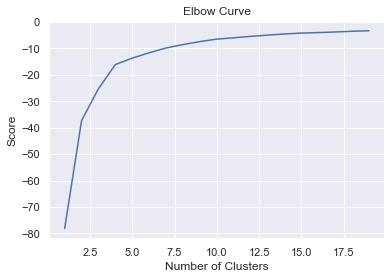

In [807]:
import pylab as pl
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
df_master = pd.read_csv("CAZipPopulations_healthcare_metro.csv", encoding = "ISO-8859-1")
df_master.dropna(axis=0, inplace=True)
df_master=df_master[df_master['Total_Income_2017']>0]
df_master=df_master[['Zip_Code','Population_White_2017']]
#df_master=df_master[['Zip_Code','Population_Black_2017']]

#df_master.drop(labels=['City','Metro'], axis=1,inplace = True)
x = df_master.values
z = minmax.fit_transform(x)
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(z).score(z) for i in range(len(kmeans))]
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Step 5 Finds CLusters using K-Means

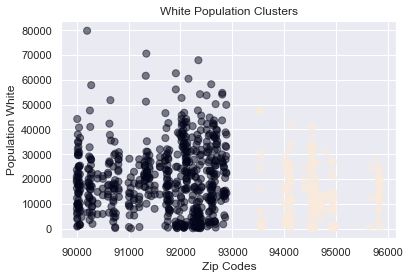

In [814]:
# K means Clustering for Behaviour 
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(z)
centroids = kmeans.cluster_centers_
plt.xlabel('Zip Codes')
#plt.ylabel('Population Black')
#plt.title('Black Population Clusters')
plt.ylabel('Population White')
plt.title('White Population Clusters')
plt.figsize=(30,40)
#plt.scatter(df_master['Zip_Code'], df_master['Population_Black_2017'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(df_master['Zip_Code'], df_master['Population_White_2017'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)

#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
#plt.scatter(z[y_kmeans == 0, 0], z[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
#plt.scatter(z[y_kmeans == 1, 0], z[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')

# 5.1 Visualizing the data - displot

Text(0.5, 0, 'Housing Price / Income')

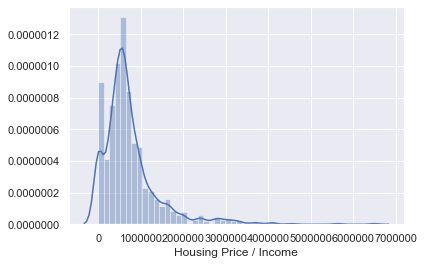

In [810]:
#Visualizing the data - displot
import seaborn as sns; sns.set()
df_master2 = pd.read_csv("CAZipPopulations_healthcare_metro.csv", encoding = "ISO-8859-1")
df_master2.dropna(axis=0, inplace=True)
df_master2=df_master2[df_master2['Total_Income_2017']>0]
df_master2=df_master2[['2017-12','Total_Income_2017']]
df_master2=df_master2.rename(columns={"2017-12": "House_Price"})
df_master2
plot_house_price = sns.distplot(df_master2["House_Price"])
#plot_income = sns.distplot(df_master["Total_Income_2017"])
plt.xlabel('Housing Price / Income')

# 5.2 Correlation can shown visually using heat map

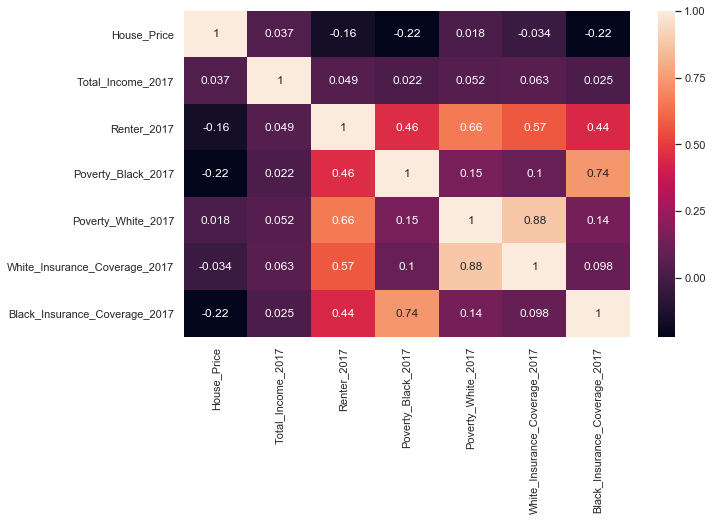

In [775]:
# correlation can shown visually using heat map
df_CA_original = pd.read_csv("CAZipPopulations_healthcare_metro.csv", encoding = "ISO-8859-1")
df_CA=df_CA_original.copy()
df_CA=df_CA.rename(columns={"2017-12": "House_Price"})
df_CA.dropna(axis=0, inplace=True)
df_CA=df_CA[df_CA['House_Price']>0]
data_1= df_CA.loc[:,['House_Price', 'Total_Income_2017','Renter_2017','Poverty_Black_2017','Poverty_White_2017','White_Insurance_Coverage_2017','Black_Insurance_Coverage_2017']]

data_1.to_csv("California_HousePrice_Corelation.csv", index=False)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(data_1.corr(), annot=True, ax=ax)

In [337]:
df_CA.corr()

,Zip_Code,Population_2012,Home_Ownership_2012,Renter_2012,Foreign_Born_2012,Poverty_Black_2012,Poverty_Hispanic_2012,Poverty_White_2012,Black_Insurance_Coverage_2012,Black_No_Insurance_Coverage_2012,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,House_Price
Zip_Code,1.000000,-0.122888,0.016951,-0.224936,-0.204716,-0.062819,-0.245383,-0.081293,-0.071989,-0.157295,...,0.016199,0.017210,0.018068,0.018565,0.018195,0.016215,0.013886,0.013155,0.013580,0.014614
Population_2012,-0.122888,1.000000,0.839196,0.827348,0.846989,0.353408,0.667396,0.696483,0.408152,0.405944,...,-0.221973,-0.221909,-0.221540,-0.221042,-0.220887,-0.220829,-0.220385,-0.219924,-0.219811,-0.219843
Home_Ownership_2012,0.016951,0.839196,1.000000,0.392956,0.585227,0.155360,0.345916,0.518263,0.270147,0.191526,...,-0.228478,-0.228489,-0.228591,-0.228741,-0.228816,-0.228761,-0.228550,-0.228336,-0.228155,-0.228050
Renter_2012,-0.224936,0.827348,0.392956,1.000000,0.837937,0.437629,0.779107,0.644471,0.414023,0.492180,...,-0.139453,-0.139345,-0.138646,-0.137704,-0.137404,-0.137354,-0.136799,-0.136247,-0.136283,-0.136510
Foreign_Born_2012,-0.204716,0.846989,0.585227,0.837937,1.000000,0.255674,0.731858,0.464401,0.265021,0.308131,...,-0.164561,-0.164562,-0.164434,-0.164151,-0.163936,-0.163457,-0.162685,-0.161969,-0.161430,-0.161060
Poverty_Black_2012,-0.062819,0.353408,0.155360,0.437629,0.255674,1.000000,0.423566,0.136908,0.727982,0.776113,...,-0.202932,-0.202405,-0.201772,-0.201054,-0.200809,-0.200800,-0.200553,-0.200210,-0.200240,-0.200372
Poverty_Hispanic_2012,-0.245383,0.667396,0.345916,0.779107,0.731858,0.423566,1.000000,0.344522,0.348082,0.449233,...,-0.290858,-0.290560,-0.290390,-0.290381,-0.290512,-0.290397,-0.289940,-0.289425,-0.289008,-0.288586
Poverty_White_2012,-0.081293,0.696483,0.518263,0.644471,0.464401,0.136908,0.344522,1.000000,0.130396,0.144239,...,0.020796,0.020841,0.021832,0.023120,0.023387,0.022714,0.022593,0.022507,0.021242,0.019509
Black_Insurance_Coverage_2012,-0.071989,0.408152,0.270147,0.414023,0.265021,0.727982,0.348082,0.130396,1.000000,0.930038,...,-0.208460,-0.208008,-0.207332,-0.206435,-0.205955,-0.205713,-0.205303,-0.204700,-0.204304,-0.203964
Black_No_Insurance_Coverage_2012,-0.157295,0.405944,0.191526,0.492180,0.308131,0.776113,0.449233,0.144239,0.930038,1.000000,...,-0.198545,-0.198150,-0.197526,-0.196701,-0.196208,-0.195823,-0.195256,-0.194656,-0.194303,-0.193900


In [338]:
data_1.corr()

,House_Price,Total_Income_2017,Home_Ownership_2017,Poverty_Black_2017,Poverty_White_2017,White_Insurance_Coverage_2017,Black_Insurance_Coverage_2017
House_Price,1.000000,0.037032,-0.220459,-0.220148,0.017553,-0.034117,-0.222081
Total_Income_2017,0.037032,1.000000,0.058244,0.021731,0.051592,0.062938,0.025068
Home_Ownership_2017,-0.220459,0.058244,1.000000,0.167207,0.476090,0.690735,0.276040
Poverty_Black_2017,-0.220148,0.021731,0.167207,1.000000,0.152629,0.104744,0.739741
Poverty_White_2017,0.017553,0.051592,0.476090,0.152629,1.000000,0.882577,0.142978
White_Insurance_Coverage_2017,-0.034117,0.062938,0.690735,0.104744,0.882577,1.000000,0.098031
Black_Insurance_Coverage_2017,-0.222081,0.025068,0.276040,0.739741,0.142978,0.098031,1.000000


# 5.3 Violinplot shows the kernel density estimation

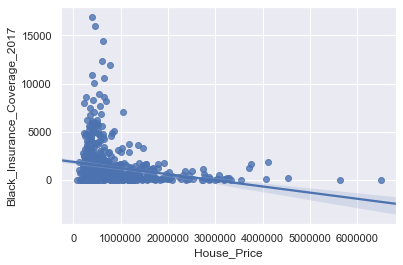

In [339]:
# Violinplot shows the kernel density estimation
# Bandwidth of the kernel shows the influence on the  resulting estimate
# fatter  bandwidth implies more males did not survive however fatter bandwidth for females shows that more females survied
#sns.violinplot(y= "Total_Income_2017", x ="Zip_Code", data=data_1)
# plotting a scatter plot between 
sns.regplot(x=data_1["House_Price"], y=data_1["Black_Insurance_Coverage_2017"])

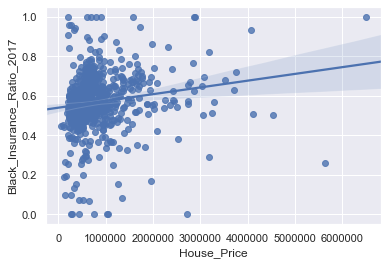

In [340]:
df_health_care_ratio=df_CA_original.copy()
df_health_care_ratio=df_health_care_ratio.rename(columns={"2017-12": "House_Price"})
df_health_care_ratio = df_health_care_ratio.sort_values(by="House_Price",ascending=False).head(5)
df_health_care_ratio= df_CA.loc[:,['Zip_Code', 'House_Price', 'Total_Income_2017','Population_Black_2017','Home_Ownership_2017','White_Insurance_Coverage_2017','Black_Insurance_Coverage_2017']]
# creating a tlinear regression
df_black_insurance_ratio=df_CA.loc[:,['House_Price']]
df_black_insurance_ratio['Black_Insurance_Ratio_2017'] =   df_health_care_ratio.iloc[0:,6] / df_health_care_ratio.iloc[0:,3] 
#df_poverty_ratio
#df_healtcare_house_price=data_1.loc[:,[ 'House_Price', 'Black_Insurance_Coverage_2017']]
df_black_insurance_ratio.dropna(axis=0, inplace=True)
df_black_insurance_ratio=df_black_insurance_ratio[df_black_insurance_ratio['House_Price']>0]
sns.regplot(x=df_black_insurance_ratio["House_Price"], y=df_black_insurance_ratio["Black_Insurance_Ratio_2017"])

# Step 6 Read combined data file

In [721]:
df_CA = pd.read_csv("CAZipPopulations_healthcare_metro.csv", encoding = "ISO-8859-1")
df_CA.dropna(axis=0, inplace=True)
df_CA=df_CA[(df_CA['Total_Income_Black_2017']>0) & (df_CA['Total_Income_Black_2016']>0) & (df_CA['Total_Income_Black_2015']>0) & (df_CA['Total_Income_Black_2014']>0) & (df_CA['Total_Income_Black_2013']>0) & (df_CA['Total_Income_Black_2012']>0) & (df_CA['2017-12']>0)]
df_CA = df_CA.sort_values(by="Total_Income_White_2015",ascending=False).head(5)
#df_CA=df_CA[df_CA['Zip_Code'].isin([94610,94133,94103,94102,94107,94027,94024,94611,94028,95138,94062,94402])]
df_CA.dropna(axis=0, inplace=True)
df_CA.head(5)

,Zip_Code,Metro,City,Population_2012,Home_Ownership_2012,Renter_2012,Foreign_Born_2012,Poverty_Black_2012,Poverty_Hispanic_2012,Poverty_White_2012,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
274,92679,Los Angeles-Long Beach-Anaheim,Coto de Caza,33034,28825,3628,3739,0,0,870,...,896200,897700,899700,903000,906300,910200,915500,920800,925200,930900
337,94025,San Francisco-Oakland-Hayward,Menlo Park,40608,25315,13688,9674,2,173,1842,...,2183800,2179900,2179200,2186000,2200700,2220800,2239000,2264000,2306500,2359400
421,94127,San Francisco-Oakland-Hayward,San Francisco,19075,15590,3232,4306,0,0,272,...,1548500,1564700,1587300,1612900,1630400,1640600,1650300,1665500,1677500,1689700
507,94618,San Francisco-Oakland-Hayward,Oakland,17074,12060,4493,2278,0,0,708,...,1554700,1559200,1560000,1564400,1572700,1579700,1585000,1602500,1623900,1645500
346,94062,San Francisco-Oakland-Hayward,Redwood City,26782,20273,5677,4472,13,73,863,...,1861500,1878200,1890700,1896000,1900400,1906500,1914300,1933500,1970100,2018600


# Step 6.1 Transpose data

In [722]:
df_CA_segment1=df_CA.iloc[0:,2:129]
columns=df_CA_segment1.City.tolist()
columns
df_Cities_12mon = df_CA.iloc[0:,129::12]
df_cities_T = df_Cities_12mon.T
df_cities_T.reset_index(level=0,inplace=True)
df_cities_T.rename(columns={'index':'YearMonth'}, inplace=True) 

df_cities_T.head()
columns.insert(0,'YearMonth')
columns

['YearMonth',
 'Coto de Caza',
 'Menlo Park',
 'San Francisco',
 'Oakland',
 'Redwood City']

# Step 6.2 Select subset of columns

In [723]:
#Select subset of columns

##Name columns
#df_cities_T.columns = ['YearMonth', 'San Francisco Nob Hill','Los Angeles Hawthorne', 'Los Angeles West Hollywood', 'Pittsburg', 'Los Angeles West Athens',]
#Extract Month and Year into separate columns

df_cities_T.columns=columns
df_cities_T['Year']= (df_cities_T['YearMonth'].str.split('-').str[0])
df_cities_T['Month']= (df_cities_T['YearMonth'].str.split('-').str[1])

df_cities_T['MonthName']=df_cities_T['Month'].apply(lambda x: 'Jun' if x == '06' else 'Dec')
df_cities_T['Yr']=df_cities_T['Year'].apply(lambda x: '\''+x[-2:])
df_cities_T['MonthYr']=df_cities_T['MonthName'] +' '+ df_cities_T['Yr']
df_cities_T.head()
df_cities_T.to_csv("CA_Metro_Price_timeseries.csv", index=False)

In [724]:
#Format function to show numbers morethan 1000 in the ticks in K
def fmt_x(x,y):
    if x >= 1000000:        
        val = int(x) / 1000000
        return '{:.1f}M'.format(val)
    elif x >= 1000:        
        val = int(x) / 1000
        return '{val:d}K'.format(val=int(val))
    else:
        return int(x)

In [725]:
df_cities_T

,YearMonth,Coto de Caza,Menlo Park,San Francisco,Oakland,Redwood City,Year,Month,MonthName,Yr,MonthYr
0,2012-01,651900,1159900,842000,790400,1087500,2012,01,Dec,'12,Dec '12
1,2013-01,705800,1422500,955300,921800,1229800,2013,01,Dec,'13,Dec '13
2,2014-01,818500,1687000,1148800,1002000,1471100,2014,01,Dec,'14,Dec '14
3,2015-01,833100,1911000,1312200,1149400,1584700,2015,01,Dec,'15,Dec '15
4,2016-01,879800,2089100,1463100,1398400,1810400,2016,01,Dec,'16,Dec '16
5,2017-01,892800,2172500,1524200,1537500,1841900,2017,01,Dec,'17,Dec '17


# Step 6.3 Visualization Median Price growth in Top 5 Metros by Size

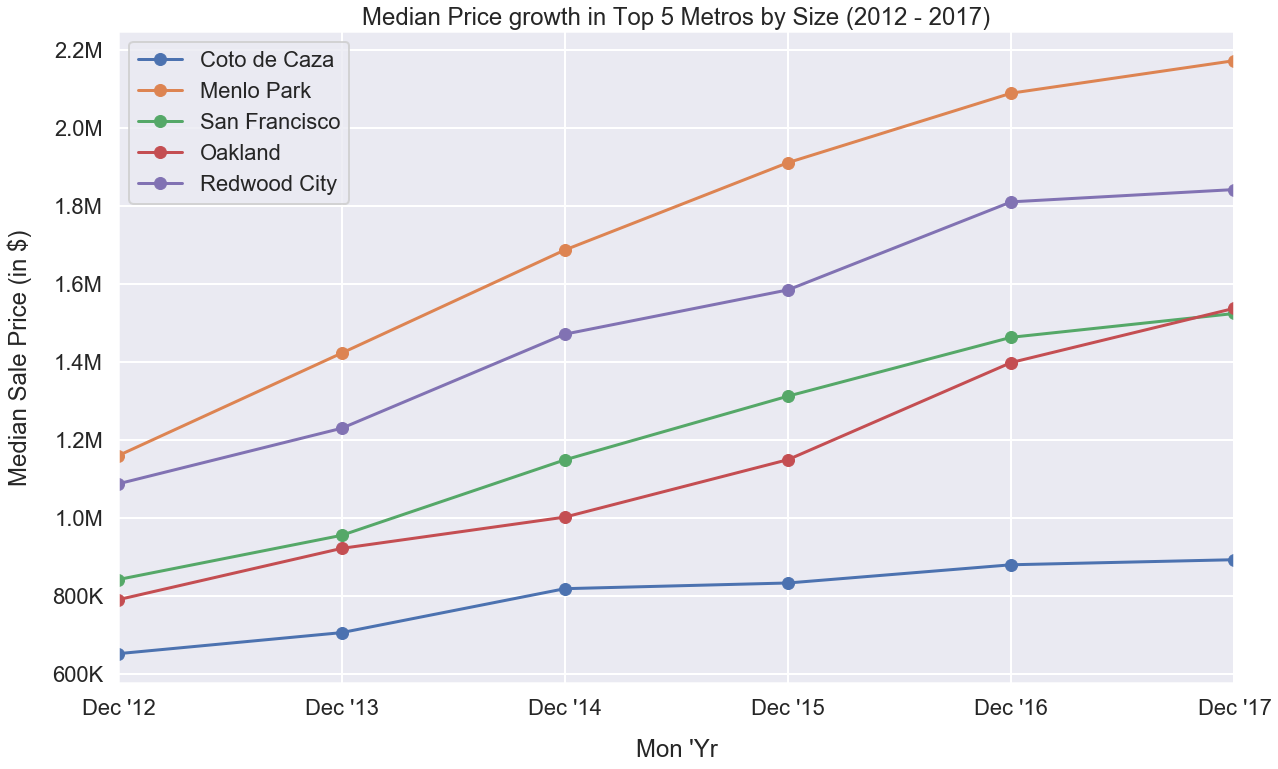

In [728]:
#plot3
import matplotlib.ticker as tick
ax=df_cities_T.plot(kind='line', x='MonthYr', figsize=(20,12), grid=True, style='o-')
ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
plt.xlabel("Mon 'Yr", labelpad=20)
plt.ylabel("Median Sale Price (in $)", labelpad=20)
plt.title("Median Price growth in Top 5 Metros by Size (2012 - 2017)")
plt.show()

In [632]:
df_home_ownership=df_CA_segment1.iloc[0:,2::21].T
df_home_ownership.reset_index(level=0,inplace=True)
df_home_ownership.rename(columns={'index':'Year'}, inplace=True) 
df_home_ownership['Year']=df_home_ownership['Year'].apply(lambda x: x[-4:])
df_home_ownership.head()

,Year,274,337,421,507,346
0,2012,28825,25315,15590,12060,20273
1,2013,28750,25197,16020,12101,20720
2,2014,28625,24981,15353,11621,20586
3,2015,28443,25448,15327,11639,20926
4,2016,28422,25887,16685,11788,19913


# Step 6.4 Define Plot functions

In [729]:
#df_Cities_12mon = pd.concat([df_CA_segment1, df_Cities_12mon], axis = 1)
#df_home_ownership=df_CA_segment1.iloc[0:,2::18]
#plot
def plot_info(df,columns,title,x_value,x_label, y_label):
    import pylab as pl
    df.columns = columns
    ax=df.plot(kind='line', x=x_value, figsize=(20,12), grid=True, style='o-')
    ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
    plt.xlabel(x_label, labelpad=20)
    plt.ylabel(y_label, labelpad=20)
    plt.title(title)
    plt.show()

In [730]:
#df_Cities_12mon = pd.concat([df_CA_segment1, df_Cities_12mon], axis = 1)
#df_home_ownership=df_CA_segment1.iloc[0:,2::18]
#plot
sns.set_context("poster")
from plotly import __version__
from plotly.offline import init_notebook_mode,iplot, plot
def plot_ratio(df,columns,title,x_value,x_label, y_label):
    import pylab as pl
    df.columns = columns
    ax=df.plot(kind='line', x=x_value, figsize=(20,12), grid=True, style='o-')
    #ax.yaxis.set_major_formatter(tick.FuncFormatter(fmt_x))
    plt.xlabel(x_label, labelpad=20)
    plt.ylabel(y_label, labelpad=20)
    plt.title(title)
    plt.show()

# Step 6.5 Visualization Median Home Ownership growth in Top 5 Metros by Size

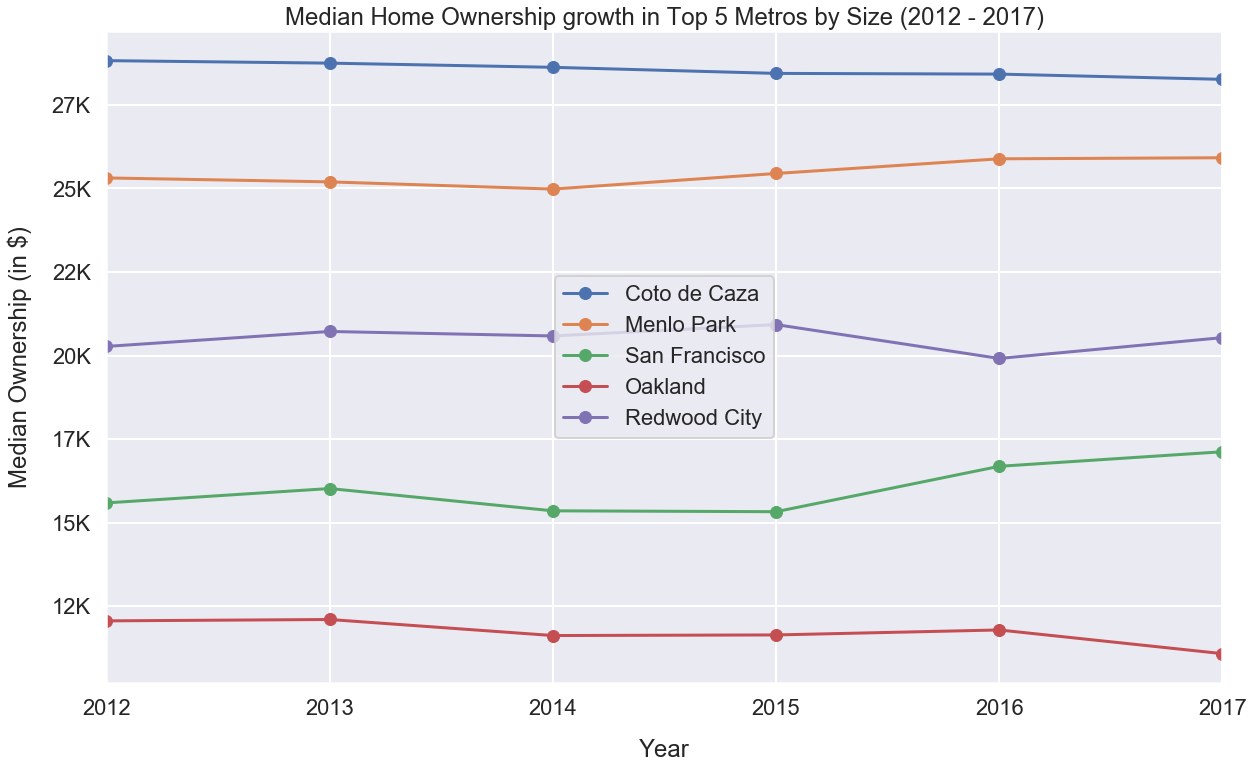

In [731]:
#columns=['Year', 'San Francisco Nob Hill','Los Angeles Hawthorne', 'Los Angeles West Hollywood', 'Pittsburg', 'Los Angeles West Athens']
columns=df_CA_segment1.City.tolist()
columns.insert(0,'Year')
df_home_ownership.to_csv("CA_Home_Ownership.csv", index=False)
plot_info(df_home_ownership,columns,"Median Home Ownership growth in Top 5 Metros by Size (2012 - 2017)","Year","Year","Median Ownership (in $)")

# Step 6.6 Visualization Median Renter growth in Top 5 Metros by Size

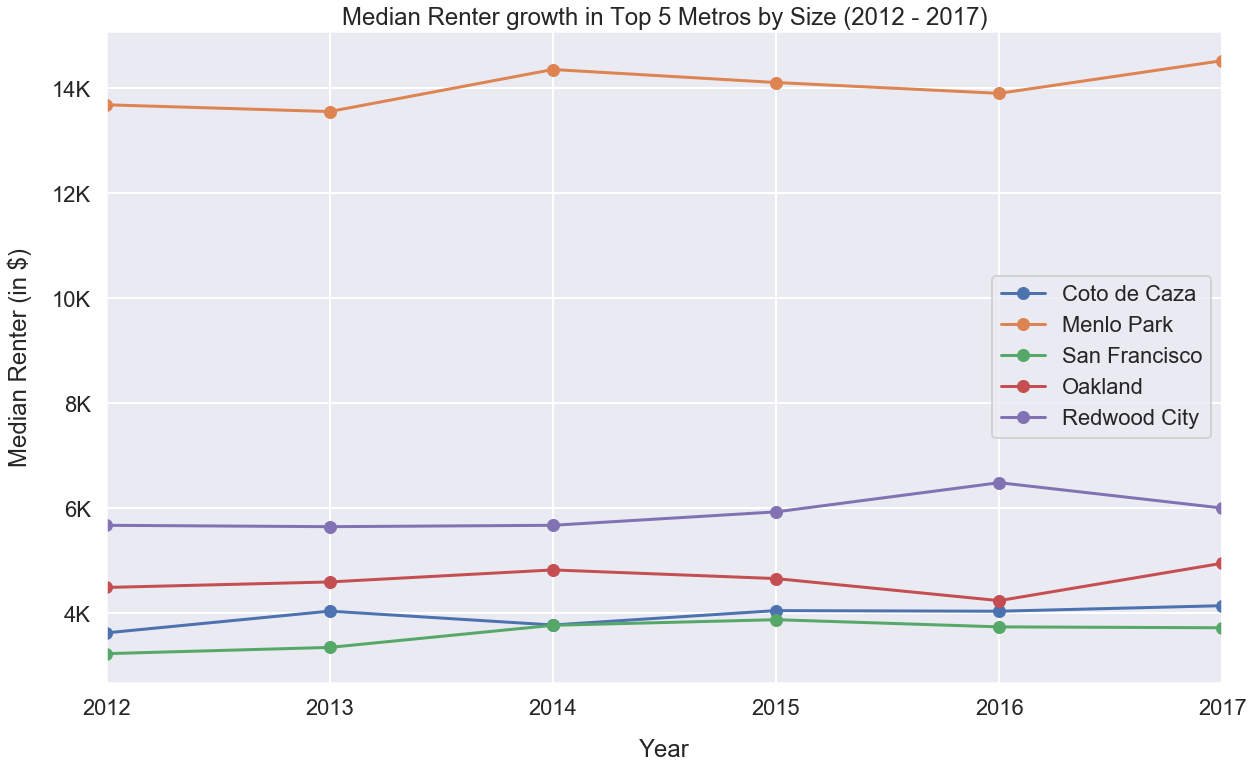

In [732]:
df_rent=df_CA_segment1.iloc[0:,3::21].T
df_rent
df_rent.reset_index(level=0,inplace=True)
df_rent.rename(columns={'index':'Year'}, inplace=True) 
df_rent['Year']=df_rent['Year'].apply(lambda x: x[-4:])
df_rent.head()
plot_info(df_rent,columns,"Median Renter growth in Top 5 Metros by Size (2012 - 2017)","Year","Year","Median Renter (in $)")

# Step 6.6 Visualization Median Poverty Black People growth in Top 5 Metros by Size

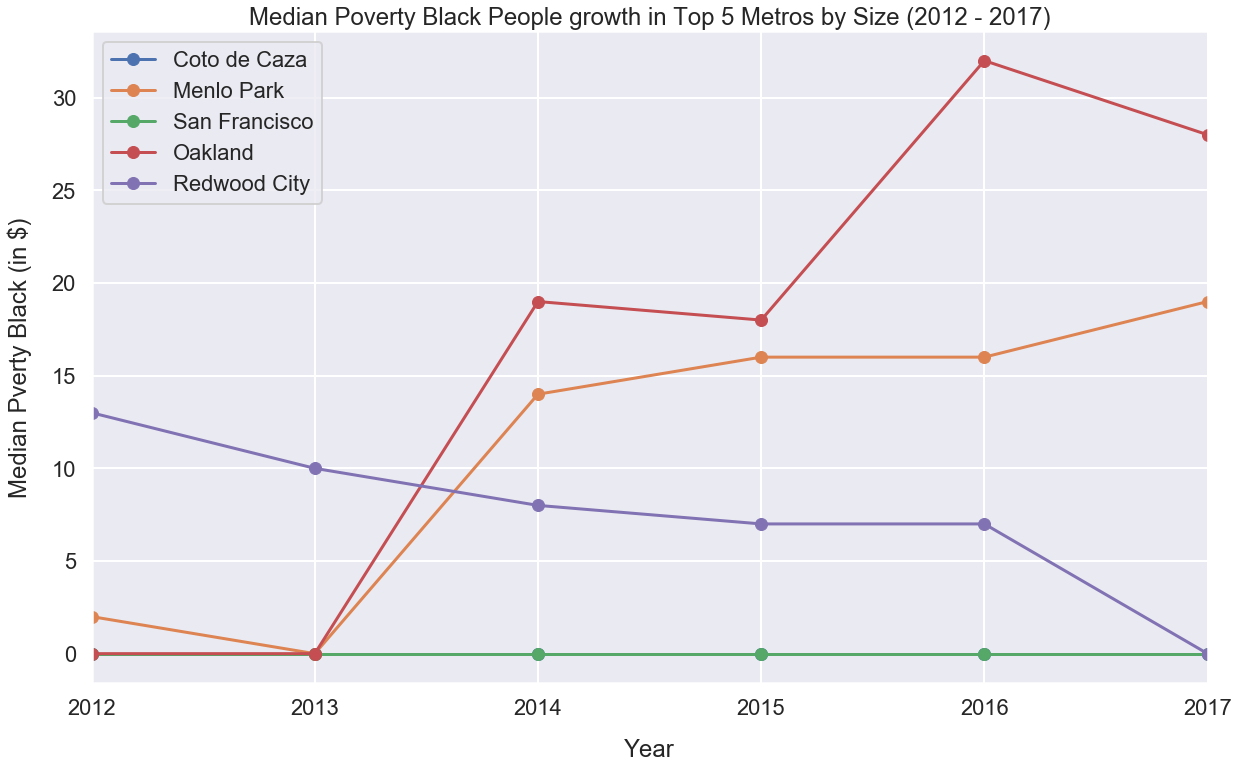

In [733]:
df_poverty_ratio=df_CA_segment1.iloc[0:,5::21].T
df_poverty_ratio.reset_index(level=0,inplace=True)
df_poverty_ratio
df_black_population=df_CA_segment1.iloc[0:,18::21].T
df_black_population
df_black_population.reset_index(level=0,inplace=True)
#df_poverty_ratio.iloc[0:,1:6] =   df_poverty_ratio.iloc[0:,1:6] / df_black_population.iloc[0:,1:6] 
df_poverty_ratio
df_poverty_ratio.rename(columns={'index':'Year'}, inplace=True) 
df_poverty_ratio['Year']=df_poverty_ratio['Year'].apply(lambda x: x[-4:])
df_poverty_ratio.head()
plot_ratio(df_poverty_ratio,columns,"Median Poverty Black People growth in Top 5 Metros by Size (2012 - 2017)","Year","Year","Median Pverty Black (in $)")

# Step 6.7 Income Ratio of White People in Top 5 Metros by Size

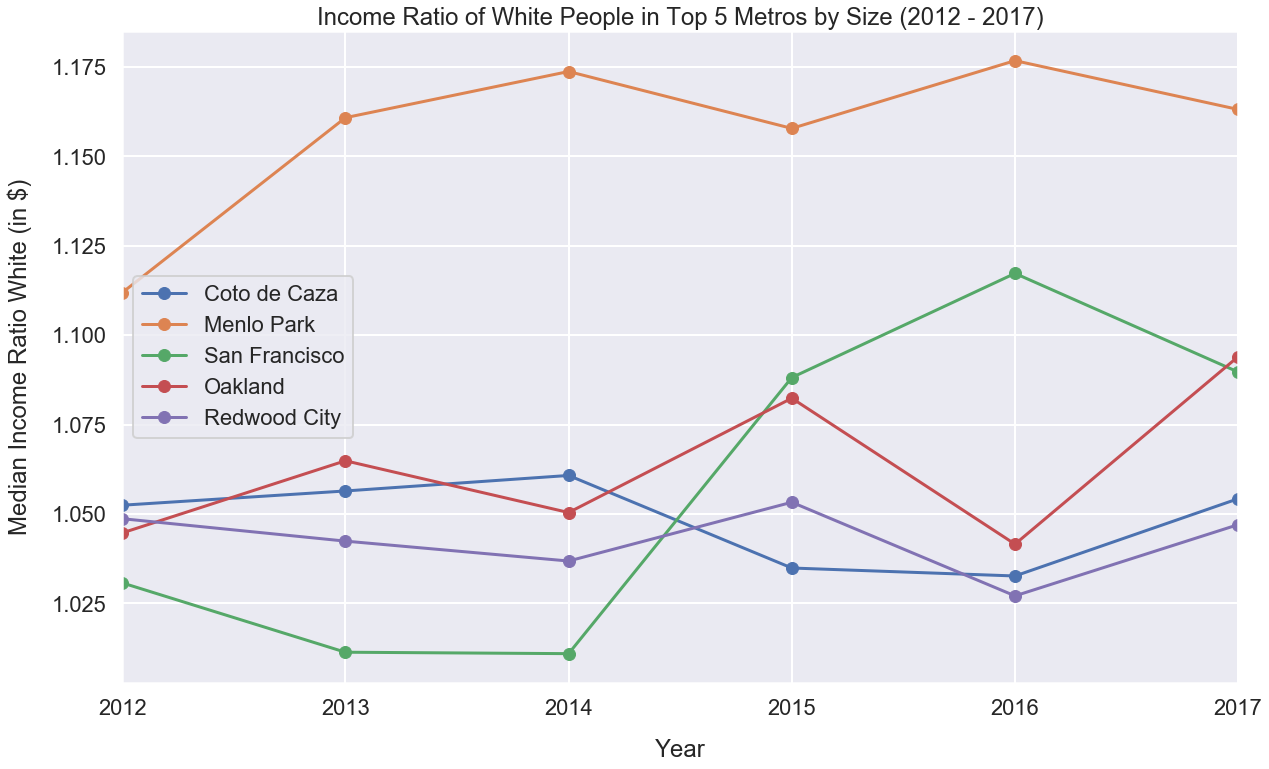

In [734]:
df_income_ratio=df_CA_segment1.iloc[0:,17::21].T
df_income_ratio.reset_index(level=0,inplace=True)
df_income=df_CA_segment1.iloc[0:,14::21].T
df_income
df_income_ratio
df_income.reset_index(level=0,inplace=True)
df_income_ratio.iloc[0:,1:6] =   df_income_ratio.iloc[0:,1:6] / df_income.iloc[0:,1:6] 
#df_population
df_income_ratio.rename(columns={'index':'Year'}, inplace=True) 
df_income_ratio['Year']=df_income_ratio['Year'].apply(lambda x: x[-4:])
df_income_ratio.head()
df_income_ratio.to_csv("CA_Income_white_timeseries.csv", index=False)
plot_ratio(df_income_ratio,columns,"Income Ratio of White People in Top 5 Metros by Size (2012 - 2017)","Year","Year","Median Income Ratio White (in $)")

# Step 6.8 Income Ratio of Black People in Top 5 Metros by Size


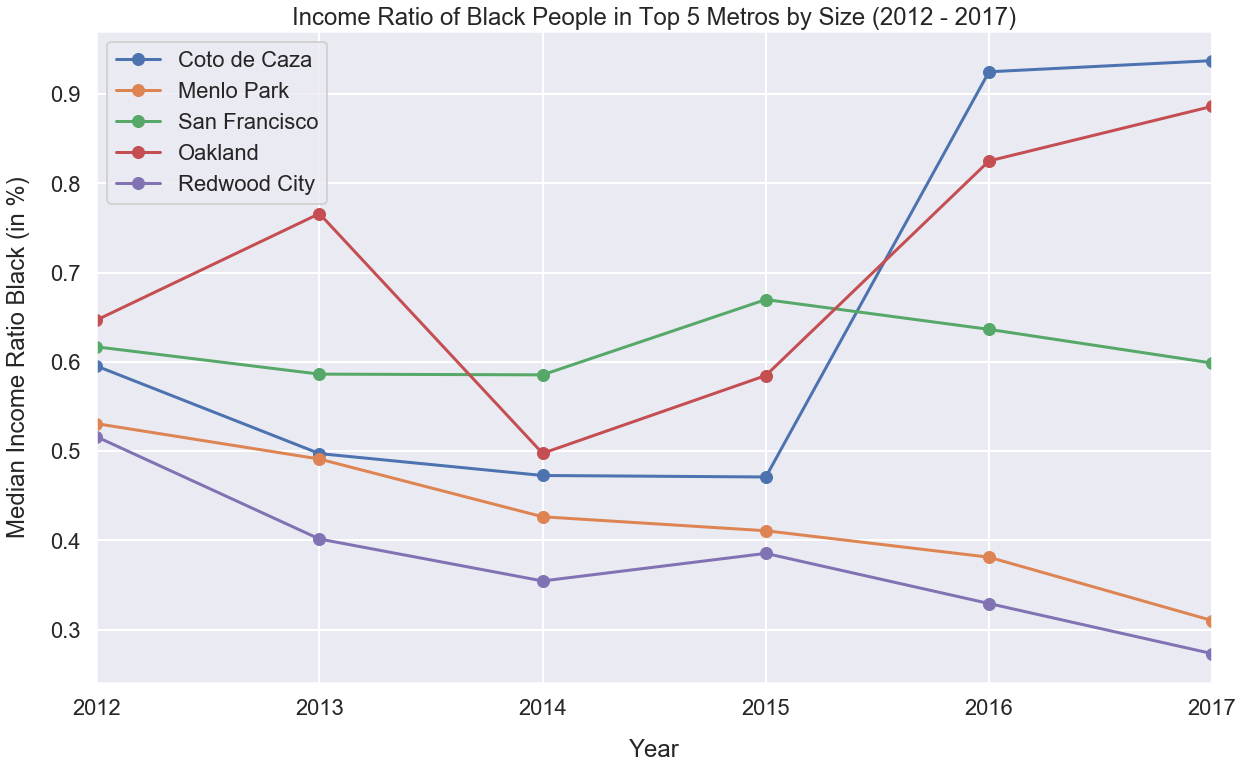

In [735]:
df_income_ratio=df_CA_segment1.iloc[0:,15::21].T
df_income_ratio.reset_index(level=0,inplace=True)
df_income=df_CA_segment1.iloc[0:,14::21].T
df_income
df_income.reset_index(level=0,inplace=True)
df_income_ratio
df_income_ratio.iloc[0:,1:6] =   df_income_ratio.iloc[0:,1:6] / df_income.iloc[0:,1:6] 
df_income_ratio.rename(columns={'index':'Year'}, inplace=True) 
df_income_ratio['Year']=df_income_ratio['Year'].apply(lambda x: x[-4:])
df_income_ratio.head()
df_income_ratio.to_csv("CA_Income_black_timeseries.csv", index=False)
plot_ratio(df_income_ratio,columns,"Income Ratio of Black People in Top 5 Metros by Size (2012 - 2017)","Year","Year","Median Income Ratio Black (in %)")

# Step 6.9 Black Population No Insurance in Top 5 Metros by Size

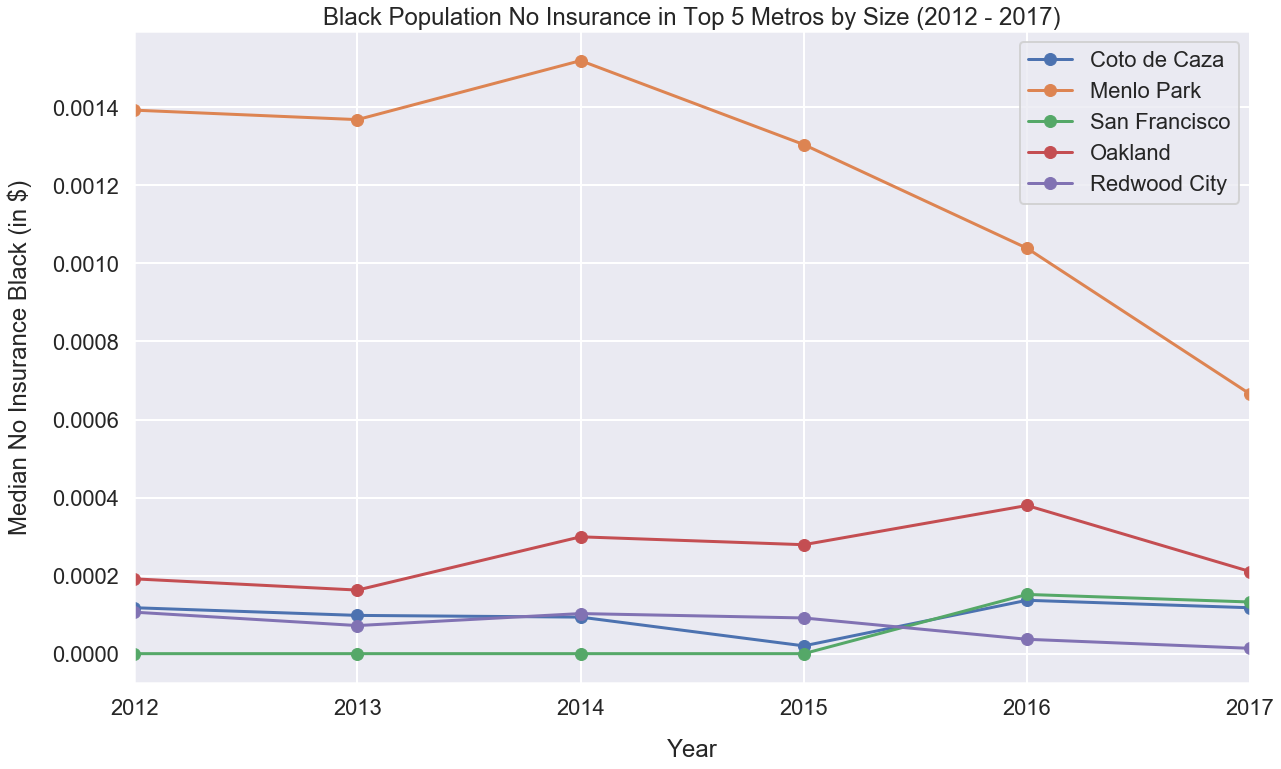

In [736]:
df_no_insurance=df_CA_segment1.iloc[0:,9::21].T
df_no_insurance
df_no_insurance.reset_index(level=0,inplace=True)
df_black_population=df_CA_segment1.iloc[0:,14::21].T
df_black_population
df_black_population.reset_index(level=0,inplace=True)
df_no_insurance
df_no_insurance.iloc[0:,1:6] =   df_no_insurance.iloc[0:,1:6] / df_black_population.iloc[0:,1:6] 
df_no_insurance
df_no_insurance.rename(columns={'index':'Year'}, inplace=True) 
df_no_insurance['Year']=df_no_insurance['Year'].apply(lambda x: x[-4:])
df_no_insurance.head()
df_no_insurance.to_csv("CA_Insurance_black_timeseries.csv", index=False)
plot_ratio(df_no_insurance,columns,"Black Population No Insurance in Top 5 Metros by Size (2012 - 2017)","Year","Year","Median No Insurance Black (in $)")

# Step 6.10 Population of Black People in Top 5 Metros by Size

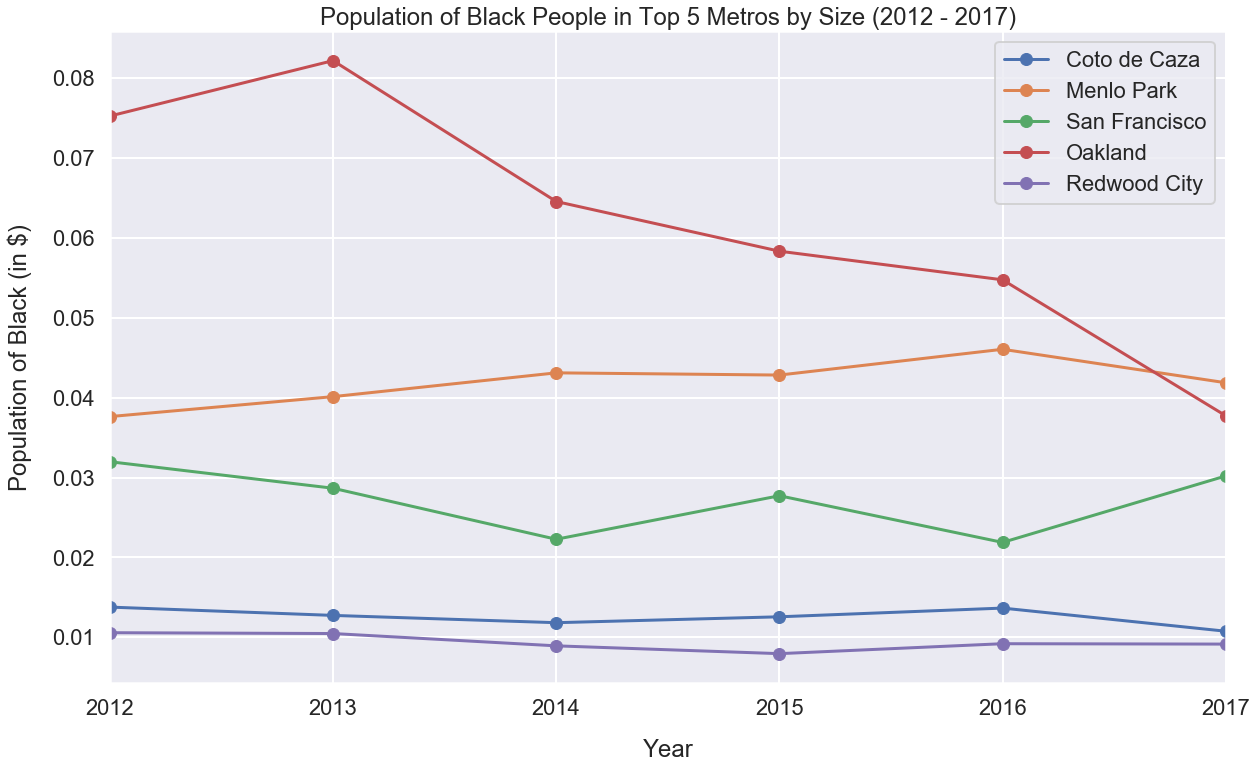

In [737]:
df_black_pop=df_CA_segment1.iloc[0:,18::21].T
df_black_pop.reset_index(level=0,inplace=True)
df_pop=df_CA_segment1.iloc[0:,1::21].T
df_pop
df_pop.reset_index(level=0,inplace=True)
df_black_pop.iloc[0:,1:6] =   df_black_pop.iloc[0:,1:6] / df_pop.iloc[0:,1:6] 
df_black_pop
df_black_pop.rename(columns={'index':'Year'}, inplace=True) 
df_black_pop['Year']=df_black_pop['Year'].apply(lambda x: x[-4:])
df_black_pop.head()
plot_ratio(df_black_pop,columns,"Population of Black People in Top 5 Metros by Size (2012 - 2017)","Year","Year","Population of Black (in $)")

In [375]:
i=0
for col in df_CA.columns: 
    print(i,col) 
    i+=1

0 Zip_Code
1 Metro
2 City
3 Population_2012
4 Home_Ownership_2012
5 Renter_2012
6 Foreign_Born_2012
7 Poverty_Black_2012
8 Poverty_Hispanic_2012
9 Poverty_White_2012
10 Black_Insurance_Coverage_2012
11 Black_No_Insurance_Coverage_2012
12 Hispanic_Insurance_Coverage_2012
13 Hispanic_No_Insurance_Coverage_2012
14 White_Insurance_Coverage_2012
15 White_No_Insurance_Coverage_2012
16 Total_Income_2012
17 Total_Income_Black_2012
18 Total_Income_Hispanic_2012
19 Total_Income_White_2012
20 Population_Black_2012
21 Population_White_2012
22 Population_Hispanic_2012
23 Population_Other_2012
24 Population_2013
25 Home_Ownership_2013
26 Renter_2013
27 Foreign_Born_2013
28 Poverty_Black_2013
29 Poverty_Hispanic_2013
30 Poverty_White_2013
31 Black_Insurance_Coverage_2013
32 Black_No_Insurance_Coverage_2013
33 Hispanic_Insurance_Coverage_2013
34 Hispanic_No_Insurance_Coverage_2013
35 White_Insurance_Coverage_2013
36 White_No_Insurance_Coverage_2013
37 Total_Income_2013
38 Total_Income_Black_2013
39 To

In [532]:
import statsmodels.api as sm
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
##Subset columns
df_CA
df_All = df_CA.iloc[0:,140::6]
df_All

,2012-12,2013-06,2013-12,2014-06,2014-12,2015-06,2015-12,2016-06,2016-12,2017-06,2017-12
421,947700,1042800,1125500,1238600,1306600,1391500,1456300,1468600,1509500,1612900,1689700
337,1405500,1542300,1662500,1756100,1894100,2053400,2091500,2170600,2167500,2186000,2359400
274,700200,779700,814600,824700,831600,852100,877100,879900,893200,903000,930900
346,1208500,1390900,1461800,1479100,1566000,1729900,1808200,1825100,1827600,1896000,2018600
412,1490400,1566400,1643700,1791900,1913300,2066500,2177700,2114900,2147800,2319600,2324500


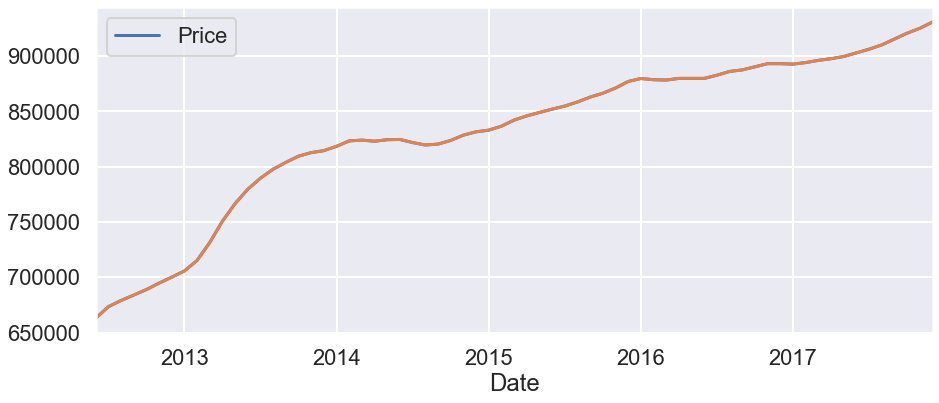

In [700]:
import statsmodels.api as sm
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
##Subset columns
df_All = df_CA.iloc[0:,134::1]
df_All['Zip_Code'] =df_CA.iloc[0:,0]
grouped=df_All.groupby('Zip_Code',as_index=True)
summedup=grouped.mean()
#grouped.aggregate(pd.sum())
firstRow=summedup.iloc[0:1]
firstRow = firstRow.T
firstRow.index.name = 'Date'
#
firstRow.reset_index(inplace=True)
firstRow.columns=['Date','Price']
firstRow['Date']=pd.to_datetime(firstRow['Date'])
#firstRow = firstRow.set_index('Date')
firstRow.set_index('Date', inplace=True)
#plt.figure(figsize=(20,12))
#plt.plot(firstRow.index, firstRow.values)
#plt.show()
firstRow.plot()
firstRow.index
firstRow
y = firstRow['Price']
y.plot(figsize=(15, 6))
#plt.show()

In [692]:
summedup

Date,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,...,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
Zip_Code,,,,,,,,,,,,,,,,,,,,,
92679,662900,673500,679100,684000,689000,694800,700200,705800,715300,731500,...,896200,897700,899700,903000,906300,910200,915500,920800,925200,930900
94025,1259200,1291800,1313000,1338700,1367000,1388300,1405500,1422500,1447700,1475000,...,2183800,2179900,2179200,2186000,2200700,2220800,2239000,2264000,2306500,2359400
94062,1131900,1144200,1154600,1174700,1191200,1197800,1208500,1229800,1261400,1295800,...,1861500,1878200,1890700,1896000,1900400,1906500,1914300,1933500,1970100,2018600
94127,878700,895600,909400,919900,931400,941200,947700,955300,967500,988200,...,1548500,1564700,1587300,1612900,1630400,1640600,1650300,1665500,1677500,1689700
94618,824400,838000,852000,868500,888000,904600,915000,921800,931500,948800,...,1554700,1559200,1560000,1564400,1572700,1579700,1585000,1602500,1623900,1645500


In [681]:

#df_cities_T = df_Cities_12mon.set_index('City').T
#df_cities_T = df_cities_T.dropna()
#df_cities_T


#y = firstRow['City'].resample('MS').mean()
#rcParams['figure.figsize'] = 18, 8
#decomposition = sm.tsa.seasonal_decompose(y, model='additive')
#fig = decomposition.plot()
#plt.show()
#firstRow
#for index, row in summedup.iterrows():
    #print(row.name)
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
result_aic=0
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            r=mod.fit().aic
            warnings.filterwarnings("ignore") # specify to ignore warning messages
            if(r<result_aic or result_aic==0):
                result_aic = r
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result_aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1989.3954291219986
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1333.8624645842117
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:977.8288870591903
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:969.6460977125656
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:783.7275314347673
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:778.141408036944
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:765.5068772249883
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:764.37351317097
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:741.6572051627678
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:738.7406615546354
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:737.0431834527936


In [682]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
start_params = [0, 0, 1.]
results = mod.fit(start_params = [0, 0, 1.])
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5989      0.125      4.774      0.000       0.353       0.845
ar.S.L12      -0.4304      0.084     -5.126      0.000      -0.595      -0.266
sigma2      3.633e+06   7.94e+05      4.578      0.000    2.08e+06    5.19e+06


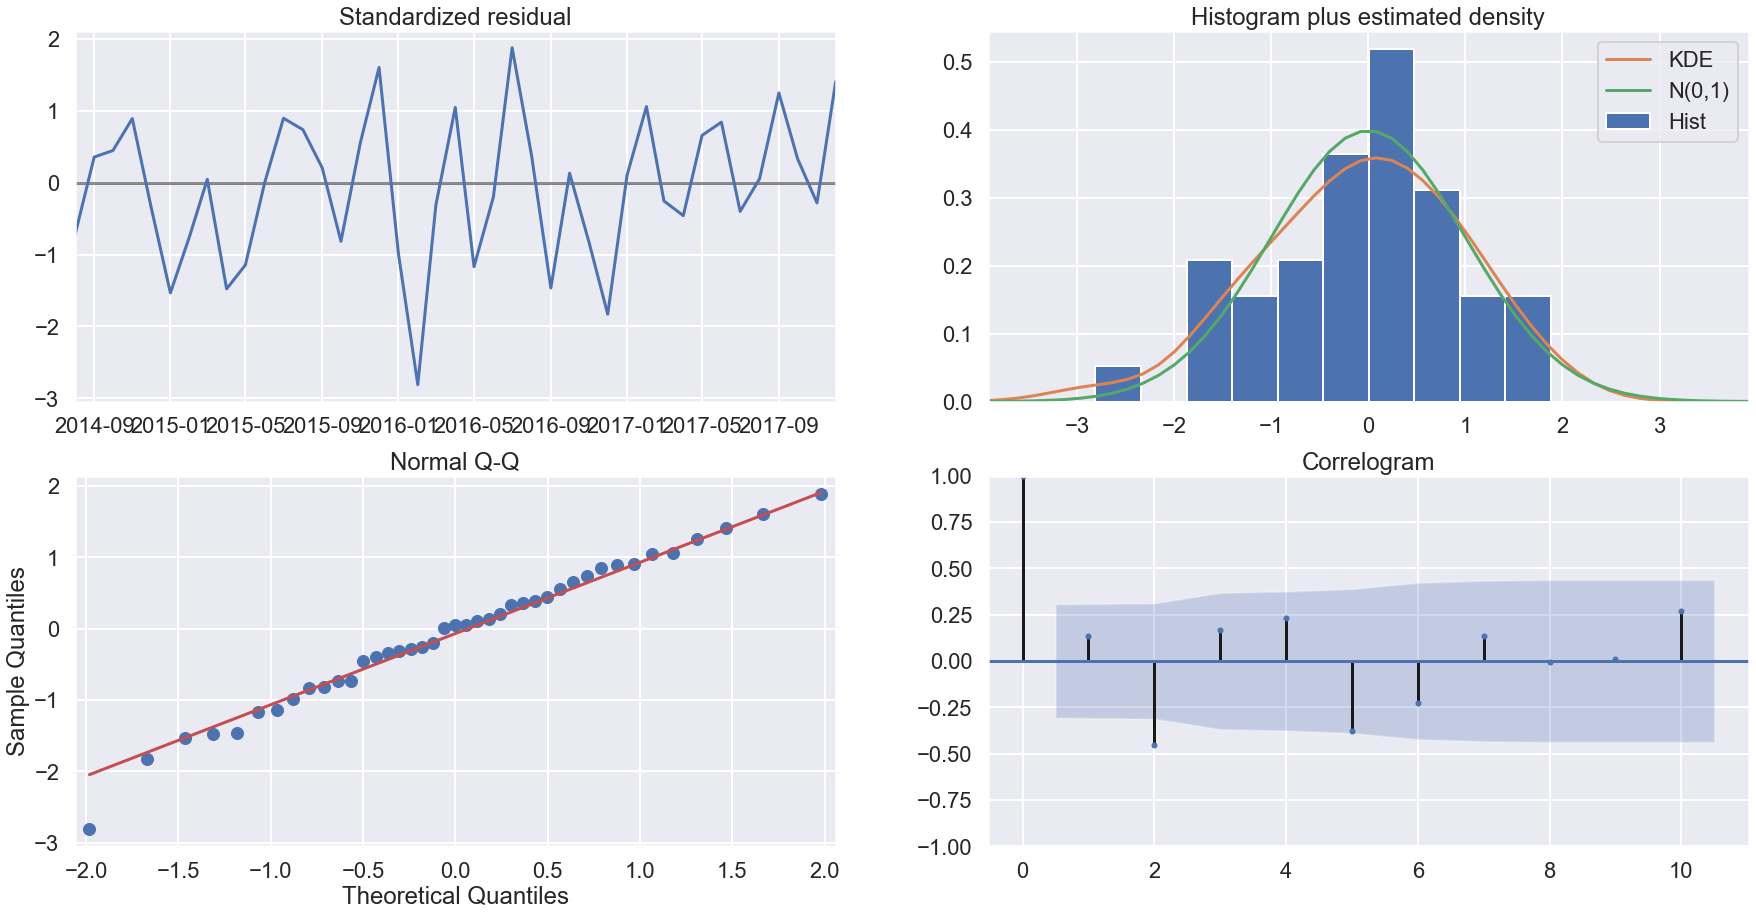

In [690]:
results.plot_diagnostics(figsize=(30, 15))
plt.show()

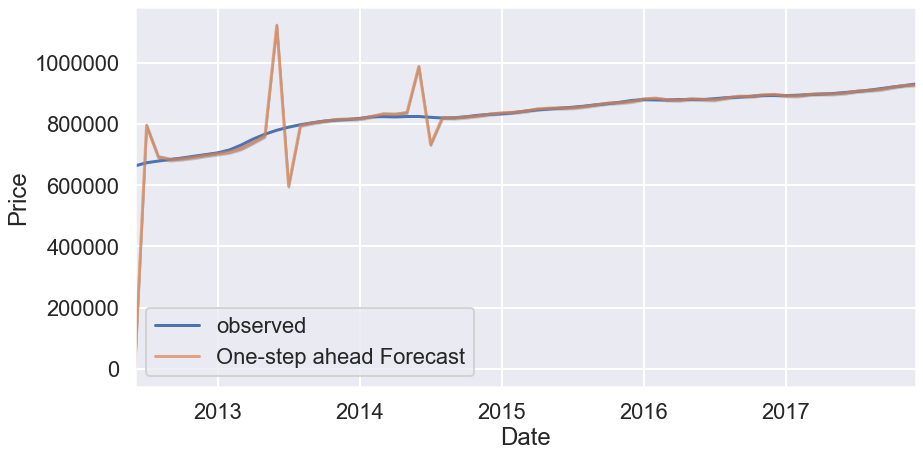

In [683]:
#firstRow.index = pd.to_datetime(firstRow.index)
pd.to_datetime('2012-06')
pred = results.get_prediction(start=pd.to_datetime('2012-06'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [684]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1960857.82
The Root Mean Squared Error of our forecasts is 1400.31


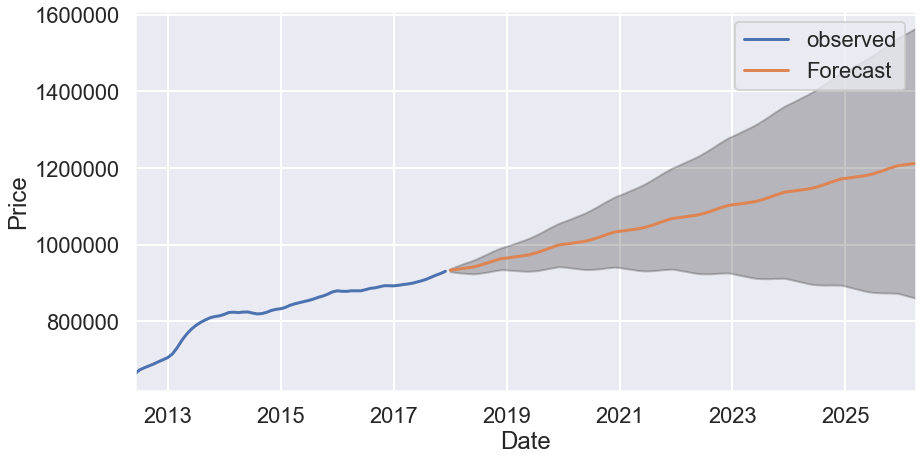

In [688]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

# Run prophet for time series analysis

In [701]:
from fbprophet import Prophet
model = Prophet(yearly_seasonality=False,daily_seasonality=False,weekly_seasonality=False)
def run_prophet(timeserie):
    #print(timeserie.index.name)
    warnings.filterwarnings("ignore")
    model = Prophet(yearly_seasonality=False,daily_seasonality=False,weekly_seasonality=False)
    model.fit(timeserie)
    forecast = model.make_future_dataframe(periods=1,freq='Y', include_history=False)
    forecast = model.predict(forecast)
    forecast.index.name=timeserie.index.name
    return forecast


In [702]:
def return_timeserie(row):
    #time_index = pd.date_range(min_date, max_date)
    warnings.filterwarnings("ignore")
    #print(row.index.values)
    firstRow=row.copy()
    firstRow = firstRow.T
    #firstRow.reset_index(inplace=True)
    firstRow.index.name = 'Date'
    firstRow.reset_index(inplace=True)
    firstRow['Date']=pd.to_datetime(firstRow['Date'])
    firstRow.columns=['ds','y']
    firstRow.index.name=row.index.values[0]
    #firstRow.rename(index = {"0": "NEW NAME"}, inplace = True) 
    return firstRow


In [703]:
import time
from tqdm import tqdm
timeserie=summedup.copy()
series = [return_timeserie(timeserie.iloc[[x]]) for x in range(0,len(timeserie.index))]
print(timeserie.index.values[0])
start_time = time.time()
result = list(map(lambda cityTimeSerie: run_prophet(cityTimeSerie), tqdm(series)))
print("--- %s seconds ---" % (time.time() - start_time))
print(len(timeserie.index))
#combine(result,summedup)

  0%|          | 0/5 [00:00<?, ?it/s]

92679


100%|██████████| 5/5 [00:12<00:00,  2.42s/it]

--- 12.288664102554321 seconds ---
5


In [704]:
cities=summedup.copy()
latestPrice=cities.iloc[:,-1]
latestPrice=latestPrice.to_frame()
latestPrice.reset_index(inplace=True)
latestPrice.columns=['Zip_Code','Latest_Price']
type(latestPrice)
latestPrice[:1]['Latest_Price']
latestPrice.get_value(0, 'Latest_Price') 

930900

In [705]:
from multiprocessing import Pool, cpu_count
start_time = time.time()
p = Pool(cpu_count())
result = list(tqdm(p.imap(run_prophet, series), total=len(series)))
p.close()
p.join()
print("--- %s seconds ---" % (time.time() - start_time))

100%|██████████| 5/5 [00:06<00:00,  2.39s/it]

--- 6.90962290763855 seconds ---


In [706]:
result2=result.copy()
type(result2)
print(len(result2))
df = pd.concat(result2)
#dfObj = pd.DataFrame(result2) 
df.head()

5


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-31,9.260574e+05,9.230336e+05,9.289975e+05,9.258839e+05,9.263837e+05,0.0,0.0,0.0,0.0,0.0,0.0,9.260574e+05
0,2017-12-31,2.277030e+06,2.250703e+06,2.301450e+06,2.276923e+06,2.277232e+06,0.0,0.0,0.0,0.0,0.0,0.0,2.277030e+06
0,2017-12-31,1.986995e+06,1.973152e+06,2.000226e+06,1.986491e+06,1.987944e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.986995e+06
0,2017-12-31,1.714984e+06,1.708030e+06,1.721682e+06,1.714668e+06,1.715578e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.714984e+06
0,2017-12-31,1.636808e+06,1.629254e+06,1.643828e+06,1.636472e+06,1.637121e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.636808e+06


In [707]:
result2[0].index.name
for j in result2:
    j.rename(index={0:j.index.name},inplace=True)
    j.index.name="Zip_Code"
result2
df2 = pd.concat(result2)
df2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
Zip_Code,,,,,,,,,,,,,
92679,2017-12-31,9.260574e+05,9.230336e+05,9.289975e+05,9.258839e+05,9.263837e+05,0.0,0.0,0.0,0.0,0.0,0.0,9.260574e+05
94025,2017-12-31,2.277030e+06,2.250703e+06,2.301450e+06,2.276923e+06,2.277232e+06,0.0,0.0,0.0,0.0,0.0,0.0,2.277030e+06
94062,2017-12-31,1.986995e+06,1.973152e+06,2.000226e+06,1.986491e+06,1.987944e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.986995e+06
94127,2017-12-31,1.714984e+06,1.708030e+06,1.721682e+06,1.714668e+06,1.715578e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.714984e+06
94618,2017-12-31,1.636808e+06,1.629254e+06,1.643828e+06,1.636472e+06,1.637121e+06,0.0,0.0,0.0,0.0,0.0,0.0,1.636808e+06


<class 'numpy.ndarray'>
[[ 90001.  54480.  21454. ... 340700. 344700. 349400.]
 [ 90002.  48613.  20173. ... 339500. 344600. 349000.]
 [ 90003.  67226.  23732. ... 343400. 346500. 349400.]
 ...
 [ 95838.  35849.  17512. ... 233900. 236500. 239000.]
 [ 95841.  18216.   7043. ... 294100. 296200. 298300.]
 [ 95864.  21538.  16798. ... 542700. 551200. 557400.]]


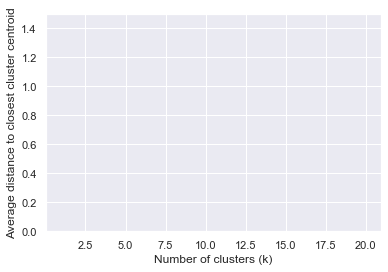

K means with k = 12
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  6  3  0  0  0  0  0  0  0  0  4  0
  0  0  0  0  0  4  0  0  0  7  0  0  2  2  4  2  2  2  0  2  0  0  6  6
  0  0  0  0 10  4  0  0  0  0  0  0  0  4  0  0  0  2  0  6  0 10  6  0
  0  0  0  3  0  0  0  0  0  0  0  0  4 10  0  0  0  0  0  0  0  0  2  0
  0  9  4  0  4  0  0  0  0  0  0 10  0  0  0  0  0  0  5  0  0  0  0  0
  0  0  0  0  0  0  0  1  8  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0
  0  2  2  0  4  0  0  0  5  0  0  0  0  0  0  1 10  0  0  0  0  0  7  4
  0  6  0  0  6  7  3  1  9  6  6  0  0  0  0  0  0  0  0  0  0  2  0  0
  0  0  0  0  0 10  0  0  0  0 10  0  0  2  0  0  0  0  0  0  0  0  6  3
 10 10  3  0  6  4  0  6  7  7  0  0  3  0  4  0  0  0  4  0  6  5  0  5
 10  8  7  5 10  6  3  5  0  1  0  0  0  0  6  5  0  0  0  0 10  0  0  0
  0  0  0  0  0 10  0 10  0  8  0  0 10  0  0 10  0 10 10  9  0  3  0  4
  0  0  0  4  5  3  0  0  0  0

In [541]:
#optimum clusters ###################
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn

k_means = KMeans(n_clusters=5)

df_master = pd.read_csv("CAZipPopulations_healthcare_metro.csv", encoding = "ISO-8859-1")
df_master.drop(labels=['City','Metro'], axis=1,inplace = True)
k_means.fit(df_master) #K-means training
y_pred = k_means.predict(df_master)

#We store the K-means results in a dataframe
pred = pd.DataFrame(y_pred)
pred.columns = ['Zip_Code']

#we merge this dataframe with df
prediction = pd.concat([df_master,pred], axis = 1)




# Convert DataFrame to matrix
MyMatrixClean = df_master.values
## Check it
print(type(MyMatrixClean))
print(MyMatrixClean)
distance_to_closter_cluster_centre = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(MyMatrixClean)
    distance = np.min(kmeans.transform(MyMatrixClean),axis=1)
    average_distance = np.mean(distance)
    distance_to_closter_cluster_centre.append(average_distance)

clusters = np.arange(len(distance_to_closter_cluster_centre))+1
plt.plot(clusters, distance_to_closter_cluster_centre)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average distance to closest cluster centroid')
plt.ylim(0,1.5)
plt.show()

################# k means with k = 12 #####################


# Using sklearn

kmeans_object3 = sklearn.cluster.KMeans(n_clusters=12)
#print(kmeans_object)
kmeans_object3.fit(MyMatrixClean)
# Get cluster assignment labels
labels3 = kmeans_object3.labels_
print("K means with k = 12\n", labels3)
# Format results as a DataFrame
Myresults3 = pd.DataFrame([df_master.index,labels3]).T
print("k means RESULTS\n", Myresults3)